In [11]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

In [12]:
numpy_saved_dir_path = "/content/drive/MyDrive/Gem Classification - Research/image_based_transfer_learning/numpy"

train_X = np.load(os.path.join(numpy_saved_dir_path, "train_X.npy"))
test_X = np.load(os.path.join(numpy_saved_dir_path, "test_X.npy"))
train_y = np.load(os.path.join(numpy_saved_dir_path, "train_y.npy"))
test_y = np.load(os.path.join(numpy_saved_dir_path, "test_y.npy"))

In [13]:
base_model = keras.applications.MobileNetV3Small (
    weights="imagenet",
    input_shape=(224, 224, 3),
    include_top=False,
    include_preprocessing=False
)

In [14]:
base_model.trainable = False

In [15]:
inputs = keras.Input(shape=(224, 224, 3))
x = base_model(inputs, training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
outputs = keras.layers.Dense(8)(x)
model = keras.Model(inputs, outputs)

In [16]:
model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.CategoricalAccuracy()]
)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 MobilenetV3small (Functiona  (None, 7, 7, 576)        939120    
 l)                                                              
                                                                 
 global_average_pooling2d_1   (None, 576)              0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 8)                 4616      
                                                                 
Total params: 943,736
Trainable params: 4,616
Non-trainable params: 939,120
_________________________________________________________________


In [17]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    height_shift_range=0.2,
    width_shift_range=0.2
)

In [18]:
model_save_dir_path = "/content/drive/MyDrive/Gem Classification - Research/image_based_transfer_learning/models/MobileNetV3Small"

best_loss_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(model_save_dir_path, "MobileNetV3Small-best_loss_model.h5"),
    monitor="loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

best_val_loss_checkpoint = keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(model_save_dir_path, "MobileNetV3Small-best_val_loss_model.h5"),
    monitor="val_loss",
    save_best_only=True,
    save_weights_only=True,
    mode="min"
)

In [19]:
bs = 32

history = model.fit(
    datagen.flow(train_X, train_y, batch_size=bs, shuffle=True),
    steps_per_epoch=train_X.shape[0] // bs,
    epochs=10,
    validation_data=(test_X, test_y),
    validation_steps=test_X.shape[0],
    callbacks=[best_loss_checkpoint, best_val_loss_checkpoint],
    verbose=1
)

Epoch 1/10
22/22 [==============================] - 26s 998ms/step - loss: 1.7326 - categorical_accuracy: 0.4092 - val_loss: 1.3631 - val_categorical_accuracy: 0.5244
Epoch 2/10
22/22 [==============================] - 20s 895ms/step - loss: 1.2000 - categorical_accuracy: 0.5894 - val_loss: 0.9997 - val_categorical_accuracy: 0.6829
Epoch 3/10
22/22 [==============================] - 18s 820ms/step - loss: 0.9278 - categorical_accuracy: 0.7396 - val_loss: 0.8241 - val_categorical_accuracy: 0.7439
Epoch 4/10
22/22 [==============================] - 18s 821ms/step - loss: 0.7907 - categorical_accuracy: 0.7668 - val_loss: 0.6988 - val_categorical_accuracy: 0.8049
Epoch 5/10
22/22 [==============================] - 18s 822ms/step - loss: 0.7059 - categorical_accuracy: 0.7940 - val_loss: 0.6265 - val_categorical_accuracy: 0.8415
Epoch 6/10
22/22 [==============================] - 18s 830ms/step - loss: 0.6268 - categorical_accuracy: 0.8283 - val_loss: 0.5551 - val_categorical_accuracy: 0.829

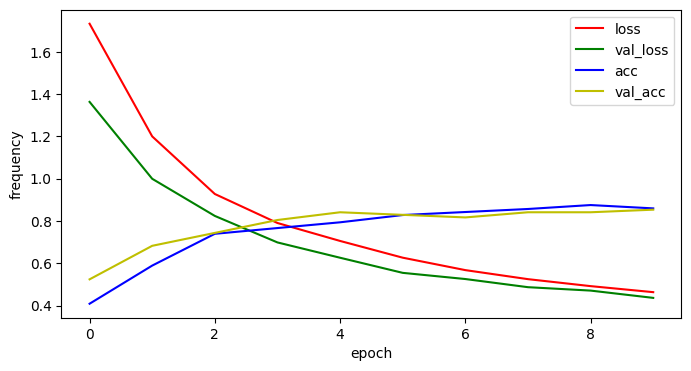

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], 'r-', label='loss')
plt.plot(history.history['val_loss'], 'g-', label='val_loss')
plt.plot(history.history['categorical_accuracy'], 'b-', label='acc')
plt.plot(history.history['val_categorical_accuracy'], 'y-', label='val_acc')
plt.xlabel('epoch')
plt.ylabel('frequency')
plt.legend()
plt.show()